In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
data = np.loadtxt("实验一/data/data1.txt", delimiter=",")  # 根据实际分隔符修改（如空格则用delimiter=" "）
X = data[:, 0].reshape(-1, 1)  # 提取第一列作为X
y = data[:, 1].reshape(-1, 1)  # 提取第二列作为y

In [11]:
# 数据标准化（加速梯度下降收敛）
X_mean, X_std = np.mean(X), np.std(X)
y_mean, y_std = np.mean(y), np.std(y)

X_normalized = (X - X_mean) / X_std
y_normalized = (y - y_mean) / y_std

X = X_normalized
y = y_normalized

In [12]:
def compute_loss(theta0, theta1, X, y):
    predictions = theta0 + theta1 * X
    return np.sum((predictions - y)**2)

def compute_gradients(theta0, theta1, X, y):
  
    grad_theta0 =  np.sum((theta0 + theta1 * X) - y)
    grad_theta1 =  np.sum(((theta0 + theta1 * X) - y) * X)
    return grad_theta0, grad_theta1

# 超参数设置
learning_rate = 0.0001
n_iterations = 100

# 初始化参数
theta0 = 1.0
theta1 = 1.0
loss_history = []

# 梯度下降迭代
for i in range(n_iterations):
    grad0, grad1 = compute_gradients(theta0, theta1, X, y)
    theta0 -= learning_rate * grad0
    theta1 -= learning_rate * grad1
    loss = compute_loss(theta0, theta1, X, y)
    loss_history.append(loss)
    if i % 10 == 0:
        print(f"Iteration {i}: Loss = {loss:.4f}")

print(f"\n最终参数: theta0 = {theta0:.4f}, theta1 = {theta1:.4f}")

Iteration 0: Loss = 126.5307
Iteration 10: Loss = 109.2387
Iteration 20: Loss = 95.0095
Iteration 30: Loss = 83.3006
Iteration 40: Loss = 73.6656
Iteration 50: Loss = 65.7371
Iteration 60: Loss = 59.2130
Iteration 70: Loss = 53.8444
Iteration 80: Loss = 49.4267
Iteration 90: Loss = 45.7915

最终参数: theta0 = 0.3773, theta1 = 0.8990


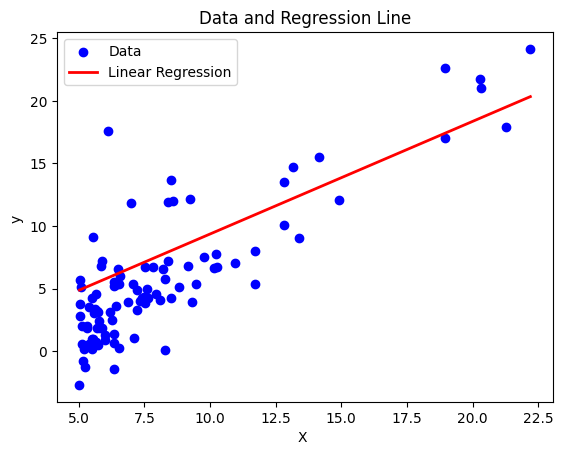

In [13]:
# 绘制原始数据散点图
plt.scatter(data[:, 0], data[:, 1], c='blue', label='Data')
# 绘制拟合直线
x_plot = np.linspace(np.min(data[:, 0]), np.max(data[:, 0]), 100)
y_plot = theta0 + theta1 * x_plot
plt.plot(x_plot, y_plot, c='red', linewidth=2, label='Linear Regression')
plt.xlabel('X ')
plt.ylabel('y ')
plt.legend()
plt.title('Data and Regression Line')
plt.show()

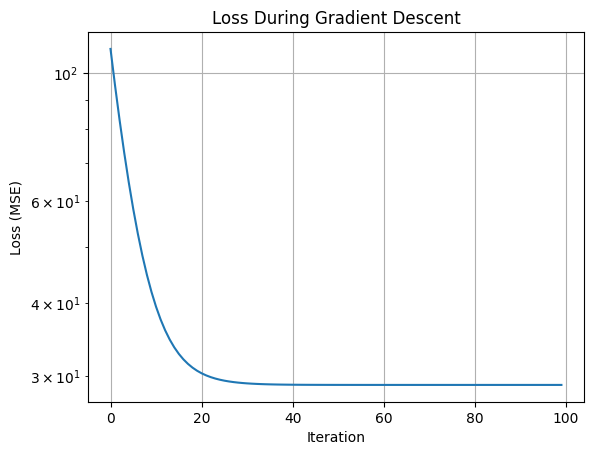

In [15]:
plt.plot(range(0, n_iterations), loss_history)
plt.xlabel('Iteration')
plt.ylabel('Loss (MSE)')
plt.yscale('log')  # 使用对数刻度更清晰显示下降趋势
plt.title('Loss During Gradient Descent')
plt.grid(True)
plt.show()

In [17]:
def predict(x_new, theta0, theta1):
    return theta0+theta1*x_new

x_new =  int(input("请输入一个整数："))
print("预测结果为:" + str(predict(x_new, theta0, theta1)))

请输入一个整数： 5


预测结果为:4.872504309452002
